In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

### Create Latitude and Longitude Combinations

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

638

## 6.2.6 Get the City Weather Data

In [6]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6d66aa9d628b1271daa5baed23258f3


In [7]:
#Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | pandan niog
Processing Record 3 of Set 1 | biak
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | alyangula
Processing Record 12 of Set 1 | turukhansk
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | colinas
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | jacqueville
Processing Record 24 of Set 1 | nazret
Proce

Processing Record 43 of Set 4 | zherdevka
Processing Record 44 of Set 4 | segovia
Processing Record 45 of Set 4 | pacifica
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | wuwei
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | uruzgan
Processing Record 50 of Set 4 | montepuez
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | salym
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | oranjestad
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | potam
Processing Record 11 of Set 5 | dunedin
Processing Record 12 of Set 5 | capao da canoa
Processing Record 13 of Set 5 | haines junction
Processing Record 14 of Set 5 | acapulco
Processing Record 15 of Set 5 | saint pete beach
Processing Record 16 of Set 5 | hikari
Proc

Processing Record 31 of Set 8 | manicore
Processing Record 32 of Set 8 | lebedinyy
Processing Record 33 of Set 8 | kandrian
Processing Record 34 of Set 8 | arieseni
Processing Record 35 of Set 8 | jinchang
Processing Record 36 of Set 8 | presidencia roque saenz pena
Processing Record 37 of Set 8 | kalispell
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | tilichiki
Processing Record 40 of Set 8 | energetik
Processing Record 41 of Set 8 | bintulu
Processing Record 42 of Set 8 | kadoma
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | ambilobe
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | riyadh
Processing Record 47 of Set 8 | champerico
Processing Record 48 of Set 8 | qui nhon
Processing Record 49 of Set 8 | chirongui
Processing Record 50 of Set 8 | hay river
Processing Record 1 of Set 9 | lapeer
Processing Record 2 of Set 9 | zverinogolovskoye
Processing Record 3 of Set 9 | toliary
City not found. Skipping..

Processing Record 19 of Set 12 | nenjiang
Processing Record 20 of Set 12 | phan thiet
Processing Record 21 of Set 12 | yulara
Processing Record 22 of Set 12 | lodwar
Processing Record 23 of Set 12 | maracas
Processing Record 24 of Set 12 | gambita
City not found. Skipping...
Processing Record 25 of Set 12 | buchanan
Processing Record 26 of Set 12 | kyabram
Processing Record 27 of Set 12 | dubuque
Processing Record 28 of Set 12 | riverton
Processing Record 29 of Set 12 | peniche
Processing Record 30 of Set 12 | cantagallo
Processing Record 31 of Set 12 | knysna
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | cardoso
Processing Record 34 of Set 12 | aktash
Processing Record 35 of Set 12 | luganville
Processing Record 36 of Set 12 | vossevangen
Processing Record 37 of Set 12 | soskovo
Processing Record 38 of Set 12 | sterling
Processing Record 39 of Set 12 | nautla
Processing Record 40 of Set 12 | andreapol
Processing Record 41 of Set 12 | halalo
City not foun

## 6.2.7 Create a DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,71.01,48,20,21.85,AU,2021-02-07 04:13:07
1,Pandan Niog,6.2282,120.5631,81.57,80,95,8.77,PH,2021-02-07 04:14:13
2,Biak,-0.9131,122.8766,84.20,63,100,1.01,ID,2021-02-07 04:14:13
3,Punta Arenas,-53.1500,-70.9167,46.40,81,0,11.50,CL,2021-02-07 04:12:07
4,Yellowknife,62.4560,-114.3525,-43.01,66,1,2.30,CA,2021-02-07 04:14:13
5,Nanortalik,60.1432,-45.2371,27.00,93,100,3.24,GL,2021-02-07 04:14:13
6,Kruisfontein,-34.0033,24.7314,66.00,81,1,1.99,ZA,2021-02-07 04:14:14
7,Cape Town,-33.9258,18.4232,69.01,73,75,16.11,ZA,2021-02-07 04:13:18
8,Bredasdorp,-34.5322,20.0403,64.40,94,99,2.30,ZA,2021-02-07 04:14:14
9,Mount Gambier,-37.8333,140.7667,64.40,59,90,18.41,AU,2021-02-07 04:14:14


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-02-07 04:13:07,-42.8794,147.3294,71.01,48,20,21.85
1,Pandan Niog,PH,2021-02-07 04:14:13,6.2282,120.5631,81.57,80,95,8.77
2,Biak,ID,2021-02-07 04:14:13,-0.9131,122.8766,84.20,63,100,1.01
3,Punta Arenas,CL,2021-02-07 04:12:07,-53.1500,-70.9167,46.40,81,0,11.50
4,Yellowknife,CA,2021-02-07 04:14:13,62.4560,-114.3525,-43.01,66,1,2.30
5,Nanortalik,GL,2021-02-07 04:14:13,60.1432,-45.2371,27.00,93,100,3.24
6,Kruisfontein,ZA,2021-02-07 04:14:14,-34.0033,24.7314,66.00,81,1,1.99
7,Cape Town,ZA,2021-02-07 04:13:18,-33.9258,18.4232,69.01,73,75,16.11
8,Bredasdorp,ZA,2021-02-07 04:14:14,-34.5322,20.0403,64.40,94,99,2.30
9,Mount Gambier,AU,2021-02-07 04:14:14,-37.8333,140.7667,64.40,59,90,18.41


In [12]:
#Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [13]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

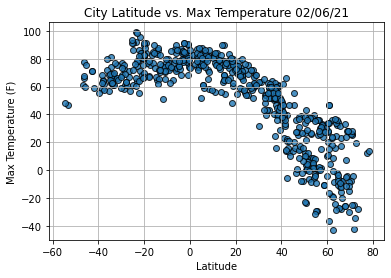

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig1.png")

#Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

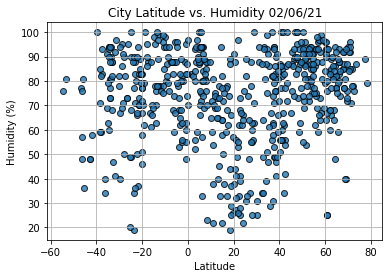

In [15]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig2.png")

#Show plot
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

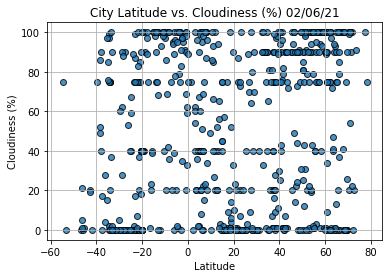

In [16]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig3.png")

#Show plot
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

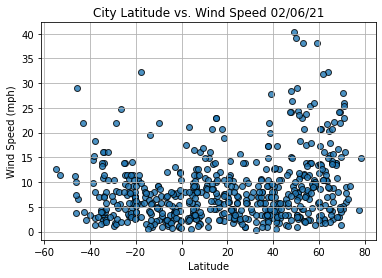

In [17]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()